In [1]:
import tensorflow as tf
import cv2
from tensorflow import keras
from keras import models, layers
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19

batch_size_ = 32
img_height = 128
img_width = 128
CHANNEL = 3
train_dir = r"./dataset/Train"
val_dir = r"./dataset/Validation"
test_dir = r"./dataset/Test"











In [2]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
])

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle = True,
    image_size = (img_height, img_width),
    batch_size = batch_size_
    )
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle = True,
    image_size = (img_height, img_width),
    batch_size = batch_size_
    )
validation_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle = True,
    image_size = (img_height, img_width),
    batch_size = batch_size_
    )
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

Found 3443 files belonging to 2 classes.
Found 985 files belonging to 2 classes.
Found 492 files belonging to 2 classes.
Found 3443 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 985 images belonging to 2 classes.


['glasses', 'no_glasses']


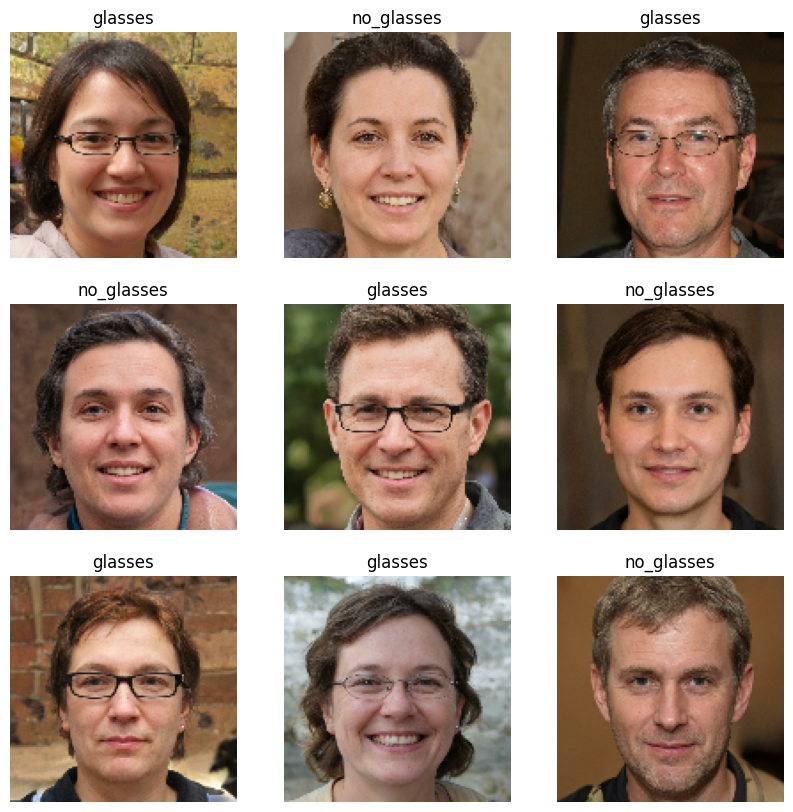

In [3]:
class_names = ['glasses','no_glasses']
print(class_names)

plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels[i]])

In [4]:
base_model= VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in base_model.layers:
    layer.trainable = False
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2,activation="softmax")
])
model.compile(tf.optimizers.Adam(learning_rate=1e-2),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.build(input_shape=(None,128,128,3))
# e= #input
history_model = model.fit(train_ds,validation_data=val_ds,epochs=10, verbose=1)





Epoch 1/10
108/108 [==============================] - 22s 116ms/step - loss: 7.5171 - accuracy: 0.8891 - val_loss: 0.2112 - val_accuracy: 0.9411
Epoch 2/10
108/108 [==============================] - 8s 76ms/step - loss: 0.1966 - accuracy: 0.9338 - val_loss: 0.2417 - val_accuracy: 0.9370
Epoch 3/10
108/108 [==============================] - 8s 77ms/step - loss: 0.1783 - accuracy: 0.9541 - val_loss: 0.1816 - val_accuracy: 0.9512
Epoch 4/10
108/108 [==============================] - 9s 81ms/step - loss: 0.1614 - accuracy: 0.9634 - val_loss: 0.1824 - val_accuracy: 0.9654
Epoch 5/10
108/108 [==============================] - 9s 84ms/step - loss: 0.1608 - accuracy: 0.9477 - val_loss: 0.1804 - val_accuracy: 0.9573
Epoch 6/10
108/108 [==============================] - 9s 86ms/step - loss: 0.1438 - accuracy: 0.9553 - val_loss: 0.1805 - val_accuracy: 0.9614
Epoch 7/10
108/108 [==============================] - 10s 89ms/step - loss: 0.1372 - accuracy: 0.9564 - val_loss: 0.2158 - val_accuracy: 0.9

In [7]:
model.save("glasses_detection.h5")

In [6]:
model.evaluate(test_ds)

31/31 [==============================] - 6s 197ms/step - loss: 0.0765 - accuracy: 0.9827


[0.07650993019342422, 0.982741117477417]